# The Infinite Well in 1D

## Overview:
- **Teaching:** 20 min
- **Exercises:** 5 min

**Questions**
- What is the infinite potential well?
- What are the solutions to the infinite potential well in the time-independent case?
- How can I write and visualise these solutions to the infinite potential well in code?

**Objectives**
- Review the infinite potential well and its time-independent solutions.
- Undertsand that we can use our existing knowledge of Python to solve and visualise solutions to the infinite well.


## Information: Import necessary libraries

Python has a vast ecosystem of libraries that we can use to reduce and simplify the amount of code we need to write to solve problems in quantum mechanics.

We will make use of `numpy` the standard library for numerical Python and additional libraries including `matplotlib` for plotting. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Time-Independent Solutions

As you may recall from lectures, the infinite potential well describes a one-dimensional system whose potential, $V(x)$, is zero inside the well and infinite outside. If we define the bounds of the well to be between $ x = 0 $ and $ x = L $, then

$$
V(x) = \begin{cases} 
            0, &\text{if} \ 0 < x < L, \\ 
            \infty, &\text{otherwise.} 
       \end{cases}         
\tag{1} 
$$

Inside the well, a particle moves freely. The infinite potential at the edges of the well, however, keeps the particle's position constrained in the region $ 0 < x < L $. Whilst this potential is somewhat artificial (nature does not produce potentials that abrutly go to infinity), it is still a useful system to examine within the framework of quantum mechanics because: 

- it is the simplest system for which we can obtain solutions to the Schrödinger equation,
- the solutions demonstrate key quantum mechanical concepts,
- the infinite well is a useful approximation for particles tightly confined in one-dimension.

![infinite well picture](../images/infinite_well.jpg)

The solutions (wavefunctions, $\Psi(x,t)$) of the system are found by solving the time-dependent Schrödinger equation (TDSE),

$$
\frac{-\hbar^2}{2m}\frac{\partial^2{\Psi(x,t)}}{\partial{x^2}} + V(x,t)\Psi(x,t) = i\hbar\frac{\partial{\Psi(x,t)}}{\partial{t}} \ ,
\tag{2}
$$

where $m$ is the mass the particle confined to the well, and $x$ and $t$ are the position and time coordinates respectively. For the case of the infinite well, the potential, $V(x)$, is constant in time. This means that we we can use a separation of variables ($\Psi(x,t) = \psi(x)\phi(t)$) to simplify the TDSE into its time-independent form

$$
\frac{-\hbar^2}{2m}\frac{d\psi(x)}{dx^2} + V(x)\psi(x) = E\psi(x) \ .
\tag{3}
$$

This time-independent form of the Schrödinger equation (TISE) is much more easily solved analytically. The solutions to the TISE for an infinite well are

$$ 
\psi_n(x) = \sqrt{\frac{2}{L}} \sin\biggl(\frac{n \pi}{L}x \biggr)\ .
\tag{4}
$$

Note how these solutions are restricted to certain values by the positive integer $n$, which is radically different to the classical case. These solutions are known as the eigenfunctions of the system, and each solution has an associated eigenvalue - the energy of that quantum state. For the infinite potential well, these energy eigenvalues are given by

$$ 
E_n = \frac{n^2\pi^2\hbar^2}{2mL^2} \ . 
\tag{5}
$$

Again, note how the energy of the system is split into distinct energy levels; we say that the energy has been quantised.


## Visualising the Solutions

Let's visualise eigenfunctions wavefunctions given in $(4)$. Open up your Jupyter notebook and import the standard libraries used in Python for basic mathematics and plotting (see the "info" section above). We are going to need to define the width of the potential well, $L$, in our code. We shall define $L$ globally, which means that all functions within our code will 'know' what the value of $L$ is without us having to give it to them directly. Set $L$ to one angstrom ($10^{-10} \ \text{m}$) in length:

In [2]:
 L = 10**(-10)

We're now going to write a function that, when called, returns the value of the $n$'th wavefunction at a given position $x$. This function, therefore, is going to take two parameters, $n$ and $x$, and return a floating point number:

In [3]:
def psi(n, x):
    """
    Computes the value of the n'th wavefunction at a position x, using the analytic solution 
    to the Schrodinger equation for an infinite potential well.
    
    Returns:
        float
            The value of the wavefunction at x
        
    Parameters:
        x : float
            The x coordinate of the system
        
        n : integer
            Describes which state the wavefunction is in
    """
    
    return np.sqrt(2 / L) * np.sin(n * np.pi * x / L)

## Information : Tip
##### Docstrings
As you can see, I have included a documentation string ('docstring') in this function definition - it's the text in red. Simply put, a docstring is a description of what a function, class or module does. Writing docstrings is an important programming practice, as it helps other programmers understand what your code does, and how it does it. Docstrings must be written on the first line of a function declaration and must are declared with three double quotation marks ("""). If you've ever used the `help()` function in Python, you've simply been printing to screen the docstring that a previous programmer has written. Try it now by calling the `help()` function and passing our functing `psi` to it as an argument.

In order to plot our eigenfunctions, we need an array containing the y-data of each eigenfunction. In Python, however, no native array structure exists and so we are going to have to use the array structure from the numpy library that we imported at the beginning of the lesson. As we are completely filling out array with values from our eigenfunctions, lets just initialise an array using `np.empty()`. 

Let's write a function that will output an array filled with the y-data of the n'th eigenfunction, sampling each function a certain number of times.

In [4]:
def eigenfunction(n, length):
    """
    Fill an array with the y-values of the n'th eigenfunction in an infinite potential well
    
    Returns: 
        wav : array
            An array containing the y-avlues
        
    Parameters:
        l : integer
            determines the length of the outputted array (array is 4 times this length)
            
        n : integer
            describes the state of the wavefunction
    """
    
    length = int(length) # making sure that length is an integer
    
    wav = np.empty(length) # creating an empty array 
    
    for x in np.arange(0, length):
        wav[x] = psi(n, x * (L / length)) 
        
    return wav

Let's plot the first 3 eigenfunctions over the interval $0 < x < L$, sampling each eigenfunction 1000 times. 

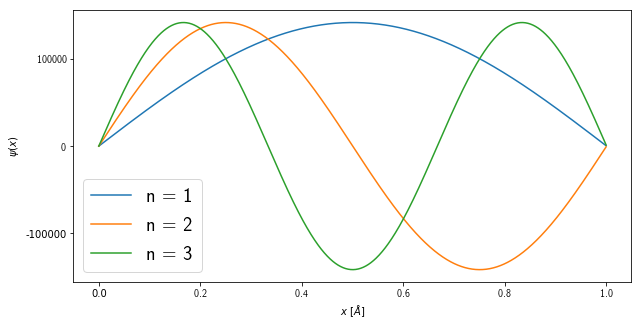

In [5]:
length = 1000 # number of samples of each eigenfunction
xvals = np.linspace(0, 1, length) # an array of x values from 0 to 1, in 0.001 increments

# arrays of y-data for each eigenfunctions
eig1 = eigenfunction(1, length) 
eig2 = eigenfunction(2, length)
eig3 = eigenfunction(3, length)

# some basic plotting magic to make the plots look better
fig = plt.figure(figsize = (10, 5));
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 20})
plt.rc('text', usetex=True) 
ax.set_xlabel(r'$x \ [\AA ]$')
ax.set_ylabel(r'$\psi(x)$')

# producing our plots
ax.plot(xvals, eig1, label = 'n = 1')
ax.plot(xvals, eig2, label = 'n = 2')
ax.plot(xvals, eig3, label = 'n = 3')
ax.legend(loc = 'best');

We have plotted here the first 3 time-independent eigenfunctions of the infinite well. There are, however, an infinite number of solutions, since $n$ can be any positive integer. These eigenfunctions all display symmtery about the centre of the well, with odd-n eigenfunctions displaying even symmtery, and even-n eigenfunctions displaying odd symmtery. This symmtery is known as parity.

## Exercise: Parity

By plotting for higher values of n, check that the symmetry property of the eigenfunctions about the centre of the well does not change.

## Key Points:
- The analytic solutions to the time-independent Schrödinger equation for the infinite potential are quantised, and are known as eigenfunctions.
- We can plot these visualise these solutions easily using Python, and explore their symmetry properties.